In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2

### A. Initial Data Cleaning

In [69]:
og_data = pd.read_csv('diabetes_data_upload.csv')

In [70]:
og_data.rename(columns={'class': 'Diabetes Result'}, inplace=True)

In [71]:
og_data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### B. Using LabelEncoder to convert binary categorical data into binary numeric data

In [75]:
enc = LabelEncoder()
og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']] = og_data[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Diabetes Result']].apply(enc.fit_transform)

In [76]:
og_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Diabetes Result
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [78]:
og_data.shape

(520, 17)

### C. Feature Evaluation

### C - 1. PCA (Principal Component Analysis)

In [98]:
X = og_data.drop(columns=['Diabetes Result'],axis=1)
y= og_data[['Diabetes Result']]
print(X.shape, y.shape)

(520, 16) (520, 1)


In [99]:
pca=PCA()
X_pca = pca.fit_transform(X)

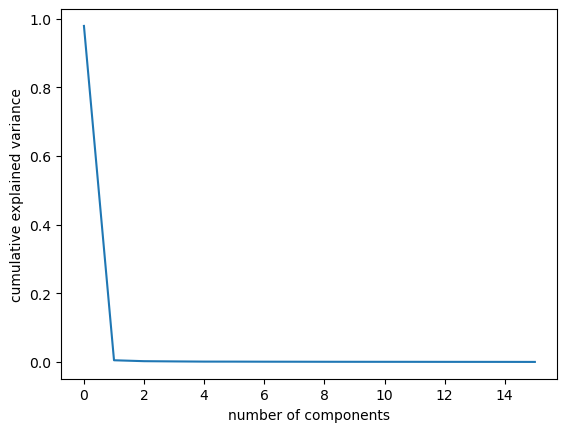

In [100]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### C - 2. Variance Threshold
Feature Selector that removes all low-variance features

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [102]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [103]:
#Find non constant features
sum(var_threshold.get_support())

16

In [104]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_threshold.get_support()]]
print(len(constant_columns))

0


In [105]:
for column in constant_columns: 
    print(column)

### C - 3. Chi-Squared

<Axes: >

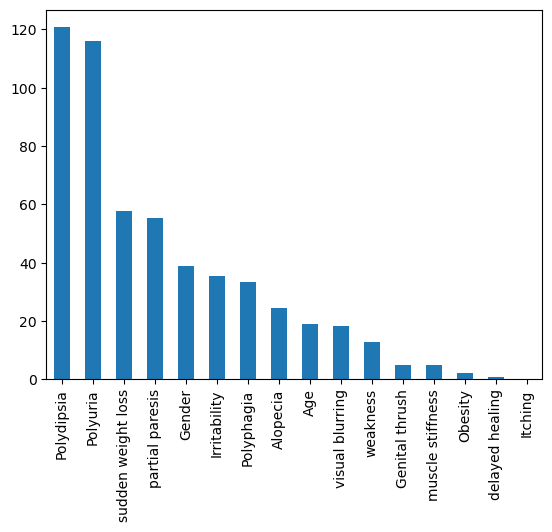

In [108]:
chi_scores = chi2(X,y)
#higher the chi value, higher the importance. 
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()